# Tutorial: ECT for example dataset

In [9]:
from ect import ECT, EmbeddedGraph, create_example_graph

import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Load in the leaf dataset
- This is a subset of the dataset provided in *cite*, with two classes (Cotton and Ivy) selected, each containing $30$ leaf outline samples.
- The ECT of each leaf sample is computed and saved as a .npy file in a directory structure matching the original dataset.


### Here is an example loading a single leaf sample, computing the ECT, and saving the output matrix.

In [11]:
# the filename of the sample to load
input_filedir = 'data/outlines/Cotton/1a_868a.npy'
output_filedir = 'data/ect/Cotton/1a_868a.npy'
leaf = np.load(input_filedir)

In [4]:
# Define a graph object for the leaf
G = EmbeddedGraph()

In [5]:
# Use coordinates of the leaf outline points to add vertices (and embedding coordinates) to the graph object
valuesX = leaf[:,0]
valuesY = leaf[:,1]
for i in range(np.shape(leaf)[0]):
    G.add_node(i,valuesX[i],valuesY[i])

<Axes: >

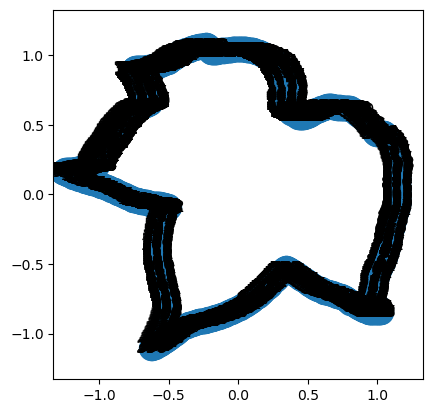

In [6]:
# Add edges to the graph according to the outline order.
# The samples of this dataset all have coordinates listed in order of the outline of the leaf.
# Note that for other datasets where this isn't the case, a different method must be used to define the graph structure.
for i in range(np.shape(leaf)[0]-1):
    G.add_edge(i, i+1)
G.add_edge(0,np.shape(leaf)[0]-1)

G.plot()

In [7]:
# initialize the ECT object using 32 directions and 48 thresholds
myect = ECT(num_dirs = 32, num_thresh=48)
print(f'Directions chosen are: {myect.thetas}')

Directions chosen are: [0.         0.19634954 0.39269908 0.58904862 0.78539816 0.9817477
 1.17809725 1.37444679 1.57079633 1.76714587 1.96349541 2.15984495
 2.35619449 2.55254403 2.74889357 2.94524311 3.14159265 3.33794219
 3.53429174 3.73064128 3.92699082 4.12334036 4.3196899  4.51603944
 4.71238898 4.90873852 5.10508806 5.3014376  5.49778714 5.69413668
 5.89048623 6.08683577]


In [8]:
# Set the bounding radius to be the global dataset bounding radius
global_bound_radius = 2.9092515639765497 # [TO DO]: compute the dataset global radius within ect package
myect.set_bounding_radius(global_bound_radius)
print(f'Set radius is: {myect.bound_radius}')
# Now the thresholds are set.
print(f'Thresholds chosen are: {myect.threshes}')

Set radius is: 2.9092515639765497
Thresholds chosen are: [-2.90925156 -2.78545363 -2.66165569 -2.53785775 -2.41405981 -2.29026187
 -2.16646393 -2.04266599 -1.91886805 -1.79507011 -1.67127218 -1.54747424
 -1.4236763  -1.29987836 -1.17608042 -1.05228248 -0.92848454 -0.8046866
 -0.68088866 -0.55709073 -0.43329279 -0.30949485 -0.18569691 -0.06189897
  0.06189897  0.18569691  0.30949485  0.43329279  0.55709073  0.68088866
  0.8046866   0.92848454  1.05228248  1.17608042  1.29987836  1.4236763
  1.54747424  1.67127218  1.79507011  1.91886805  2.04266599  2.16646393
  2.29026187  2.41405981  2.53785775  2.66165569  2.78545363  2.90925156]


In [9]:
# Calculate the ECT using the directions and thresholds specified by myect object
myect.calculateECT(G)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

M has shape: (32, 48)
Saving the ECT of sample as: data/ect/Cotton/1a_868a.npy ...


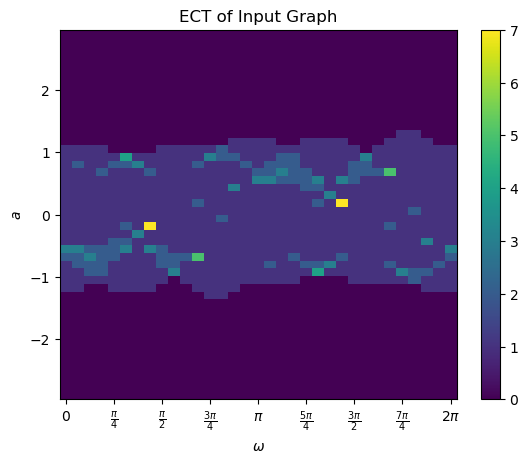

In [13]:
# The saved ECT matrix
M = myect.get_ECT()
print(f'M has shape: {M.shape}')

myect.plot('ECT')

# save the ECT matrix as a numpy file
Path(os.path.dirname(output_filedir)).mkdir(parents=True, exist_ok=True)
print(f'Saving the ECT of sample as: {output_filedir} ...')
np.save(output_filedir, M)

### Now perform the same  process on all of the samples of the dataset, computing the ECT, and saving the output matrix.

In [14]:
mypath = 'data/outlines/'
mypath_output = 'data/ect/'


# loop through file system
classes=[]
class_count = 0
for path, subdirs, files in os.walk(mypath):
    classes.extend(subdirs)
    files = [f for f in files if not f[0] == '.']
    subdirs[:] = [d for d in subdirs if (d[0] != '.')]
    print('Computing ECT of files in ', path, '...')
    print("There are ",len(files), ' samples to load in this directory.')
    
    for name in files:
        input_filedir = os.path.join(path, name)
        leaf = np.load(input_filedir)
        
        # Define a graph object for the leaf
        G = EmbeddedGraph()

        # Use coordinates of the leaf outline points to add vertices (and embedding coordinates) to the graph object
        valuesX = leaf[:,0]
        valuesY = leaf[:,1]
        for i in range(np.shape(leaf)[0]):
            G.add_node(i,valuesX[i],valuesY[i])

        # Add edges to the graph according to the outline order
        for i in range(np.shape(leaf)[0]-1):
            G.add_edge(i, i+1)
        G.add_edge(0,np.shape(leaf)[0]-1)
        
        # initialize the ECT object using 32 directions and 48 thresholds
        myect = ECT(num_dirs = 32, num_thresh=48)

        # Set the bounding radius to be the global dataset bounding radius
        # TO DO: compute the dataset global radius within ect package
        global_bound_radius = 2.9092515639765497
        myect.set_bounding_radius(global_bound_radius)

        myect.calculateECT(G)

        # The saved ECT matrix
        M = myect.get_ECT()


        # save the ECT matrix as a numpy file
        output_filedir = os.path.join(mypath_output+ input_filedir[len(mypath):])
        Path(os.path.dirname(output_filedir)).mkdir(parents=True, exist_ok=True)
        np.save(output_filedir, M)
        
        
    print('Saving the ECT of directory in ', path, '...')


Computing ECT of files in  data/outlines/ ...
There are  0  samples to load in this directory.
Saving the ECT of directory in  data/outlines/ ...
Computing ECT of files in  data/outlines/Ivy ...
There are  30  samples to load in this directory.
Saving the ECT of directory in  data/outlines/Ivy ...
Computing ECT of files in  data/outlines/Cotton ...
There are  30  samples to load in this directory.
Saving the ECT of directory in  data/outlines/Cotton ...


### Now we have a saved dataset consisting of ECT matrices for the leaf outline dataset. We can train various models using these ECT matrices. Here, we show an example using a Convolutional Neural Network (CNN) to perform binary classification between the "Cotton" and "Ivy" classes.

# Train a CNN model on the ECT images

In [1]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm

In [2]:
# This is the CNN model class we will use for classification, defined in models.py
# Within this class, we specify the kernel size parameter. 
from models import CNN 

In [3]:
# These functions allow us to define datasets and load them into PyTorch.
# The dataset classes and data loaders can be adjusted in dataloaders.py
from dataloaders import create_datasets, create_data_loaders
from utils import save_model, save_plots, save_cf, SaveBestModel

In [4]:
# Model training parameters:
# Using batch size = 4, defined in dataloaders.py
NUM_EPOCHS = 50 # number of epochs to train the network for; type=int
LEARNING_RATE = 1e-3 # learning rate for training; type=float

In [5]:
# device
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



### Load in the dataset and split into training and test datasets

In [6]:
# build train and test datasets
train_dataset, test_dataset = create_datasets()

# get the training and test data loaders
train_loader, test_loader = create_data_loaders(train_dataset, test_dataset)

/Users/sarahmcguire/Documents/GitHub/ect/docs/notebooks/leaf-example-tutorial/data/ect/
['Ivy', 'Cotton']
num_classes= 2
ECT data; using only normalize, rotation transforms on training data


In [7]:
# show a few samples from the training dataset
trainimages, trainlabels = next(iter(train_loader))
print(f'The tensor shape of each batch in the training dataset is \n[batch_size, num_channels, num_directions, num_thresholds]: {trainimages.shape}')

The tensor shape of each batch in the training dataset is 
[batch_size, num_channels, num_directions, num_thresholds]: torch.Size([4, 1, 32, 48])


training images


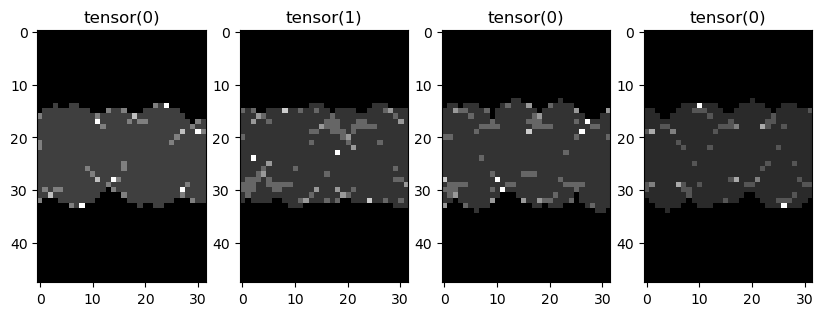

The labels for this example batch are tensor([0, 1, 0, 0]), where 0 indicates Ivy and 1 indicates Cotton


In [10]:
plt.style.use('default')
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
print('training images')
for i in range(4):
    ax = axes[i]
    ax.imshow(trainimages[i,0,:,:].T, cmap='gray')
    ax.set_title(trainlabels[i])
plt.show()

print(f'The labels for this example batch are {trainlabels}, where 0 indicates Ivy and 1 indicates Cotton')

In [11]:
# function to train the  model and keep track of loss and accuracy
def train(model, train_loader, optimizer, lossfcn):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(train_loader), total=len(train_loader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = lossfcn(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(train_loader.dataset))
    return epoch_loss, epoch_acc

In [12]:
# function for validation
def validate(model, valid_loader, lossfcn):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        outputs_list = []
        labels_list = []
        for i, data in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(image)
            outputs_list.append(outputs)
            labels_list.append(labels)
            # calculate the loss
            loss = lossfcn(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(valid_loader.dataset))

    return epoch_loss, epoch_acc

In [13]:
# specify the model to be used for training
model = CNN(num_classes=train_dataset.num_classes, num_channels=trainimages.shape[1]).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=1920, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


In [14]:
# total parameters and trainable parameters for the model
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.\n")

1,971,074 total parameters.
1,971,074 training parameters.



In [15]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
# loss function
lossfcn = nn.CrossEntropyLoss()
# initialize SaveBestModel class
save_best_model = SaveBestModel()

In [16]:
# keeping track of losses and accuracies
train_loss, valid_loss = [],[]
train_acc, valid_acc = [],[]

# begin training
for epoch in range(1,NUM_EPOCHS+1):
    print(f"[INFO]: Epoch {epoch} of {NUM_EPOCHS}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, optimizer, lossfcn)
    valid_epoch_loss, valid_epoch_acc = validate(model, test_loader, lossfcn)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")

    # save the best model up to current epoch, if we have the least loss in the current epoch
    save_best_model(
        valid_epoch_loss, epoch, model, optimizer, lossfcn
    )
    print('-'*50)
    

[INFO]: Epoch 1 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.912, training acc: 43.750
Validation loss: 0.848, validation acc: 41.667

Best validation loss: 0.8475647767384847

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.745, training acc: 33.333
Validation loss: 0.683, validation acc: 58.333

Best validation loss: 0.6832755009333292

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.686, training acc: 56.250
Validation loss: 0.684, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 4 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.680, training acc: 54.167
Validation loss: 0.697, validation acc: 41.667
--------------------------------------------------
[INFO]: Epoch 5 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.726, training acc: 56.250
Validation loss: 0.749, validation acc: 41.667
--------------------------------------------------
[INFO]: Epoch 6 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.704, training acc: 47.917
Validation loss: 0.679, validation acc: 83.333

Best validation loss: 0.6794315775235494

Saving best model for epoch: 6

--------------------------------------------------
[INFO]: Epoch 7 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.685, training acc: 60.417
Validation loss: 0.674, validation acc: 75.000

Best validation loss: 0.6736407081286112

Saving best model for epoch: 7

--------------------------------------------------
[INFO]: Epoch 8 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.687, training acc: 52.083
Validation loss: 0.692, validation acc: 41.667
--------------------------------------------------
[INFO]: Epoch 9 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.651, training acc: 68.750
Validation loss: 0.650, validation acc: 75.000

Best validation loss: 0.650400718053182

Saving best model for epoch: 9

--------------------------------------------------
[INFO]: Epoch 10 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.668, training acc: 62.500
Validation loss: 0.688, validation acc: 41.667
--------------------------------------------------
[INFO]: Epoch 11 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.636, training acc: 72.917
Validation loss: 0.598, validation acc: 75.000

Best validation loss: 0.5975846548875173

Saving best model for epoch: 11

--------------------------------------------------
[INFO]: Epoch 12 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.700, training acc: 54.167
Validation loss: 0.640, validation acc: 50.000
--------------------------------------------------
[INFO]: Epoch 13 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.604, training acc: 72.917
Validation loss: 0.592, validation acc: 75.000

Best validation loss: 0.5920097827911377

Saving best model for epoch: 13

--------------------------------------------------
[INFO]: Epoch 14 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.611, training acc: 66.667
Validation loss: 0.577, validation acc: 83.333

Best validation loss: 0.5767726401487986

Saving best model for epoch: 14

--------------------------------------------------
[INFO]: Epoch 15 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.516, training acc: 72.917
Validation loss: 0.453, validation acc: 75.000

Best validation loss: 0.4527719020843506

Saving best model for epoch: 15

--------------------------------------------------
[INFO]: Epoch 16 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.559, training acc: 68.750
Validation loss: 0.457, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 17 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.511, training acc: 75.000
Validation loss: 0.433, validation acc: 75.000

Best validation loss: 0.4329797526200612

Saving best model for epoch: 17

--------------------------------------------------
[INFO]: Epoch 18 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.463, training acc: 77.083
Validation loss: 0.441, validation acc: 75.000
--------------------------------------------------
[INFO]: Epoch 19 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.447, training acc: 81.250
Validation loss: 0.335, validation acc: 83.333

Best validation loss: 0.3349613646666209

Saving best model for epoch: 19

--------------------------------------------------
[INFO]: Epoch 20 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.468, training acc: 75.000
Validation loss: 0.284, validation acc: 83.333

Best validation loss: 0.28368139763673145

Saving best model for epoch: 20

--------------------------------------------------
[INFO]: Epoch 21 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.374, training acc: 85.417
Validation loss: 0.345, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 22 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.428, training acc: 70.833
Validation loss: 0.257, validation acc: 83.333

Best validation loss: 0.2571684444944064

Saving best model for epoch: 22

--------------------------------------------------
[INFO]: Epoch 23 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.329, training acc: 87.500
Validation loss: 0.378, validation acc: 91.667
--------------------------------------------------
[INFO]: Epoch 24 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.429, training acc: 75.000
Validation loss: 0.369, validation acc: 75.000
--------------------------------------------------
[INFO]: Epoch 25 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.376, training acc: 85.417
Validation loss: 0.239, validation acc: 91.667

Best validation loss: 0.23932760953903198

Saving best model for epoch: 25

--------------------------------------------------
[INFO]: Epoch 26 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.367, training acc: 85.417
Validation loss: 0.252, validation acc: 91.667
--------------------------------------------------
[INFO]: Epoch 27 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.399, training acc: 87.500
Validation loss: 0.243, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 28 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.328, training acc: 89.583
Validation loss: 0.167, validation acc: 91.667

Best validation loss: 0.16733003159364065

Saving best model for epoch: 28

--------------------------------------------------
[INFO]: Epoch 29 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.294, training acc: 89.583
Validation loss: 0.126, validation acc: 100.000

Best validation loss: 0.12579351291060448

Saving best model for epoch: 29

--------------------------------------------------
[INFO]: Epoch 30 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.367, training acc: 85.417
Validation loss: 0.118, validation acc: 100.000

Best validation loss: 0.11843261619408925

Saving best model for epoch: 30

--------------------------------------------------
[INFO]: Epoch 31 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.281, training acc: 85.417
Validation loss: 0.224, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 32 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.218, training acc: 89.583
Validation loss: 0.114, validation acc: 100.000

Best validation loss: 0.11444047217567761

Saving best model for epoch: 32

--------------------------------------------------
[INFO]: Epoch 33 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.285, training acc: 83.333
Validation loss: 0.144, validation acc: 91.667
--------------------------------------------------
[INFO]: Epoch 34 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.242, training acc: 91.667
Validation loss: 0.116, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 35 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.278, training acc: 87.500
Validation loss: 0.113, validation acc: 100.000

Best validation loss: 0.11278548091650009

Saving best model for epoch: 35

--------------------------------------------------
[INFO]: Epoch 36 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.293, training acc: 91.667
Validation loss: 0.130, validation acc: 91.667
--------------------------------------------------
[INFO]: Epoch 37 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.225, training acc: 93.750
Validation loss: 0.090, validation acc: 100.000

Best validation loss: 0.09041852007309596

Saving best model for epoch: 37

--------------------------------------------------
[INFO]: Epoch 38 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.148, training acc: 95.833
Validation loss: 0.146, validation acc: 83.333
--------------------------------------------------
[INFO]: Epoch 39 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.250, training acc: 87.500
Validation loss: 0.112, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 40 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.237, training acc: 91.667
Validation loss: 0.083, validation acc: 100.000

Best validation loss: 0.08282874710857868

Saving best model for epoch: 40

--------------------------------------------------
[INFO]: Epoch 41 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.116, training acc: 95.833
Validation loss: 0.090, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 42 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.199, training acc: 91.667
Validation loss: 0.072, validation acc: 100.000

Best validation loss: 0.07150235647956531

Saving best model for epoch: 42

--------------------------------------------------
[INFO]: Epoch 43 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.311, training acc: 85.417
Validation loss: 0.081, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 44 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.182, training acc: 91.667
Validation loss: 0.057, validation acc: 100.000

Best validation loss: 0.05721124059831103

Saving best model for epoch: 44

--------------------------------------------------
[INFO]: Epoch 45 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.206, training acc: 93.750
Validation loss: 0.064, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 46 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.159, training acc: 93.750
Validation loss: 0.070, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 47 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.132, training acc: 95.833
Validation loss: 0.048, validation acc: 100.000

Best validation loss: 0.048139705012242

Saving best model for epoch: 47

--------------------------------------------------
[INFO]: Epoch 48 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.129, training acc: 93.750
Validation loss: 0.086, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 49 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.152, training acc: 93.750
Validation loss: 0.059, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 50 of 50
Training


  0%|          | 0/12 [00:00<?, ?it/s]

Validation


  0%|          | 0/3 [00:00<?, ?it/s]

Training loss: 0.255, training acc: 91.667
Validation loss: 0.034, validation acc: 100.000

Best validation loss: 0.03382443015774091

Saving best model for epoch: 50

--------------------------------------------------


Saving final model...


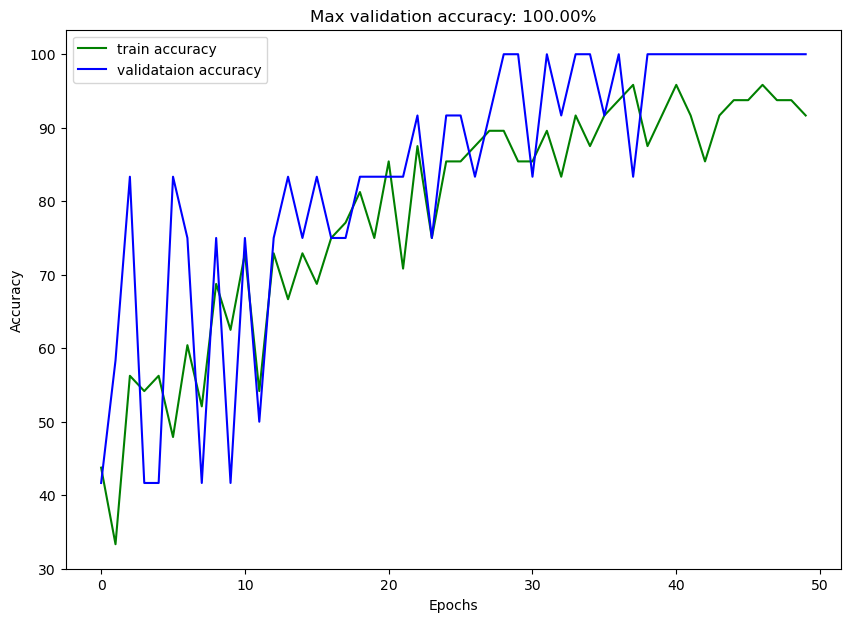

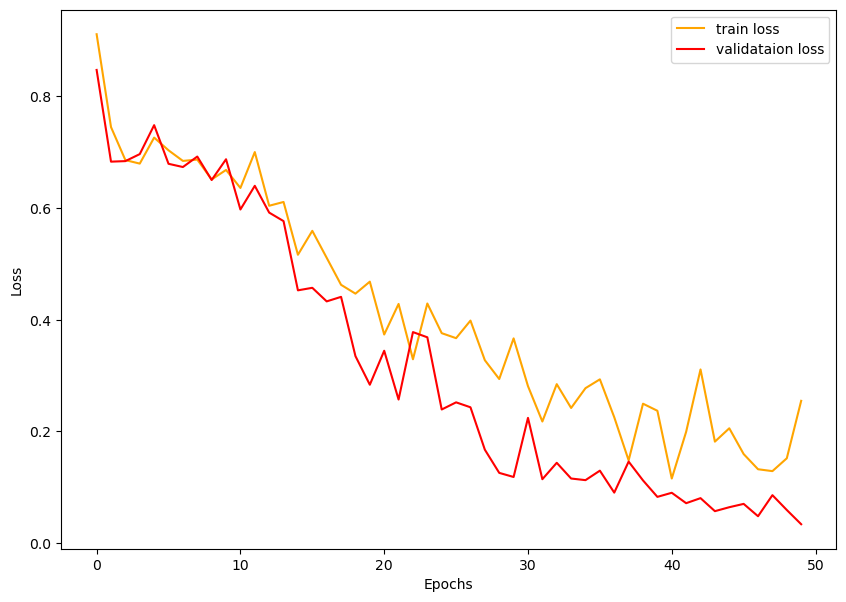

In [17]:
# save the trained model weights for a final time
save_model(NUM_EPOCHS, model, optimizer, lossfcn)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)

Using validation to compute confusion matrix


  0%|          | 0/3 [00:00<?, ?it/s]

classes: ['Ivy', 'Cotton']
Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    7.0  5.0       1.0       12.0          12.0
_______________________________________________
Confusion Matrix: 
 [[7 0]
 [0 5]]



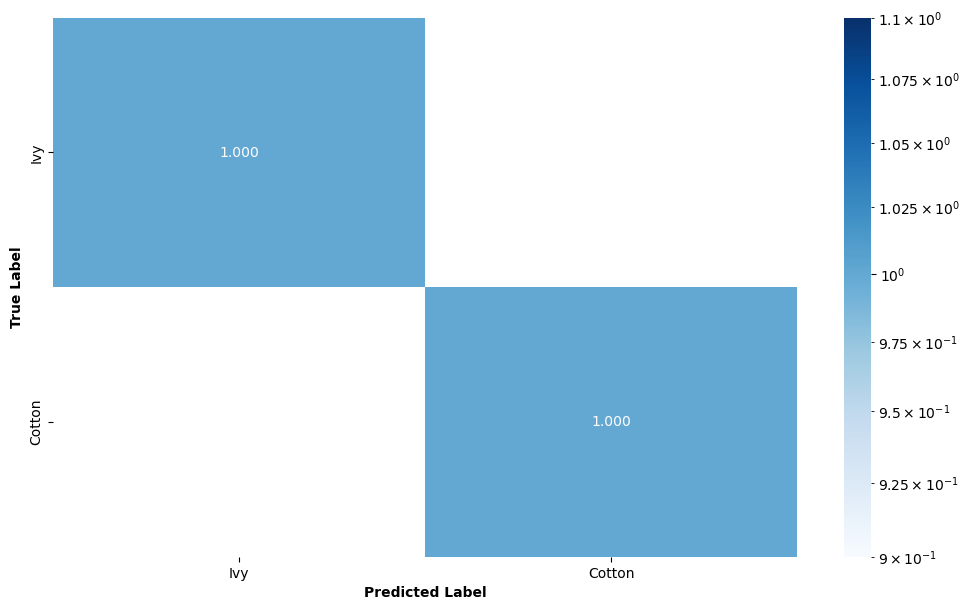

In [18]:
# save confusion matrix of best model
# model, valid_loader, lossfcn
model = CNN(num_classes=train_dataset.num_classes, num_channels=trainimages.shape[1])

state_dict = torch.load('outputs/best_model.pth')['model_state_dict']
model.load_state_dict(state_dict)
model.eval()
print('Using validation to compute confusion matrix')
valid_running_pred = []
valid_running_labels = []
counter = 0
with torch.no_grad():
    for i, data in tqdm(enumerate(test_loader), total=len(test_loader)):
        counter += 1
        
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        # forward pass
        outputs = model(image)
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)

        valid_running_pred.append(preds)
        valid_running_labels.append(labels)
    
# confusion matrix for the complete epoch
valid_running_pred = torch.cat(valid_running_pred)
valid_running_labels = torch.cat(valid_running_labels)
print('classes:',test_dataset.classes)
save_cf(valid_running_pred,valid_running_labels, test_dataset.classes)
